<img src="./images/logo-iug@2x.png" alt="IUG" style="width:300px;"/>

# Data Day@IUG 
**Learning Lab #3**: Data Exploration with Python by Dr. N. Tsourakis

[ntsourakis@iun.ch](ntsourakis@iun.ch)

## Exploratory Data Analysis

`Exploratory Data Analysis (EDA)` helps us to understand the main characteristics of the data before resorting to any solution. Visual methods are most commonly used in this case and we are going to explore few of those throughout the notebook.

## Visualization with Seaborn

[Seaborn](http://seaborn.pydata.org/) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics, and integrates with the functionality provided by Pandas ``DataFrame``s.

Check this gallery with different examples: [Seaborn gallery](http://seaborn.pydata.org/examples/index.html).

### Seaborn examples

We are going to create some typical plots with Seaborn using various datasets.

In [ ]:
# Import the necessary libraries.
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import pandas as pd

Now we create some random walk data:

In [ ]:
# Create some data
rng = np.random.RandomState(0)

# Return evenly spaced numbers over a specified interval: x[500]
x = np.linspace(0, 10, 500)

# Return the cumulative sum of the elements along a given axis: y[500][6]
y = np.cumsum(rng.randn(500, 6), 0)

y

We can set the style by calling Seaborn's ``set()`` method.
By convention, Seaborn is imported as ``sns``:

In [ ]:
import seaborn as sns
sns.set()

Now create the line plots.

In [ ]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

# Try to change the legend of the lines.

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.

In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5)

# Try to change the alpha value and see what happens.

We can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with ``sns.kdeplot``:

In [ ]:
for col in 'xy':
    sns.kdeplot(data[col], shade=False)

# Change the value of the shade from 'False' to 'True'.

We can combine histograms and KDE using ``distplot``:

C:\Users\tsouraki\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tsouraki\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


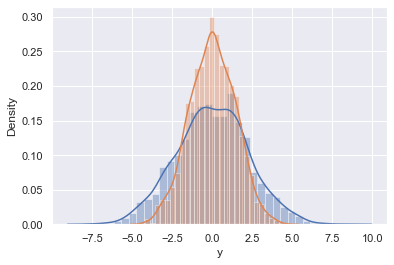

In [127]:
sns.distplot(data['x'])
sns.distplot(data['y']);

A ``jointplot`` is used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.

C:\Users\tsouraki\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


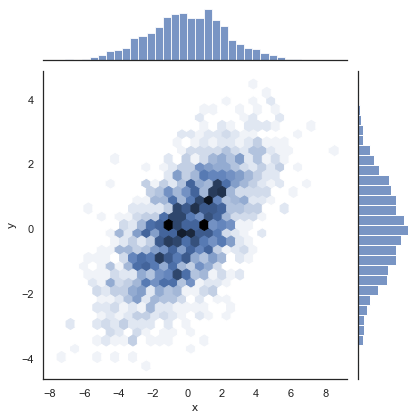

In [129]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

# Change kind from 'hex' to 'scatter'.

A ``pairplot`` visualizes given data to find the relationship between them where the variables can be continuous or categorical.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [132]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We can now proceed with the plot.

C:\Users\tsouraki\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


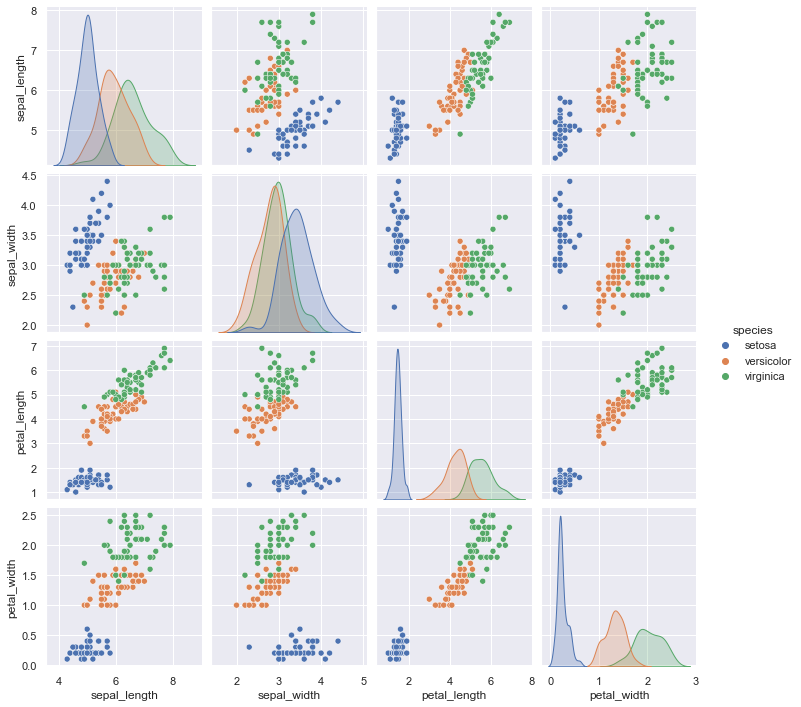

In [134]:
sns.pairplot(iris, hue='species', size=2.5);

# Change the size to '4.0'.

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [135]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [137]:
# Calculate the tip percentage.
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
tips.head()


,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


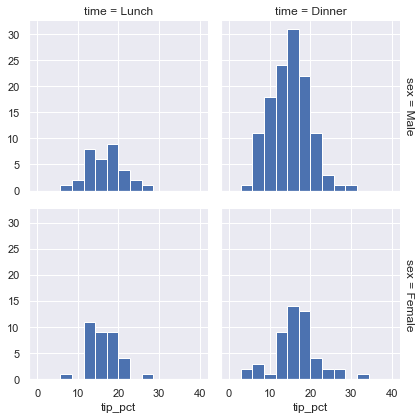

In [138]:
# Now show the plot.
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

C:\Users\tsouraki\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\tsouraki\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


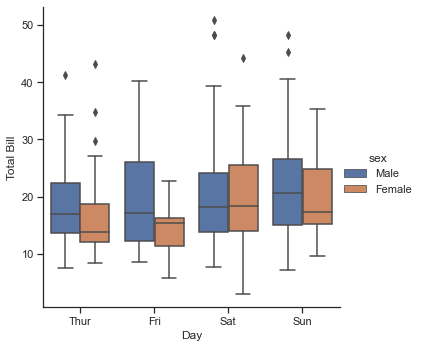

In [139]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

Similar to the pairplot we saw earlier, we can use ``sns.jointplot`` to show the joint distribution between different datasets, along with the associated marginal distributions:

C:\Users\tsouraki\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


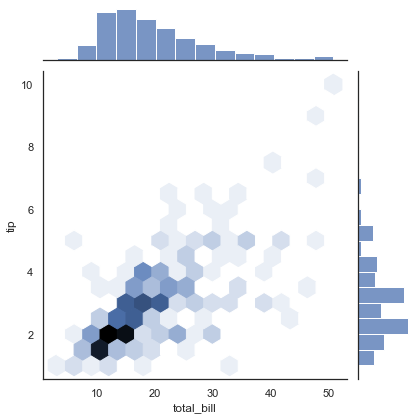

In [140]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

C:\Users\tsouraki\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


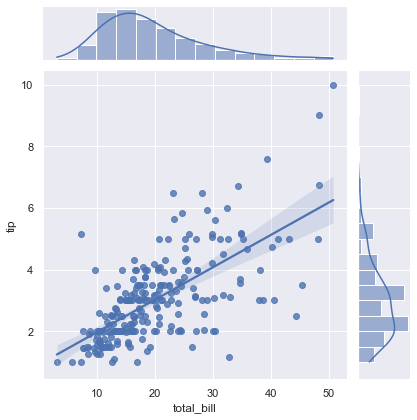

In [141]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

Time series can be plotted using ``sns.factorplot``. In the following example, we'll use the Planets data.

In [142]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


C:\Users\tsouraki\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\tsouraki\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


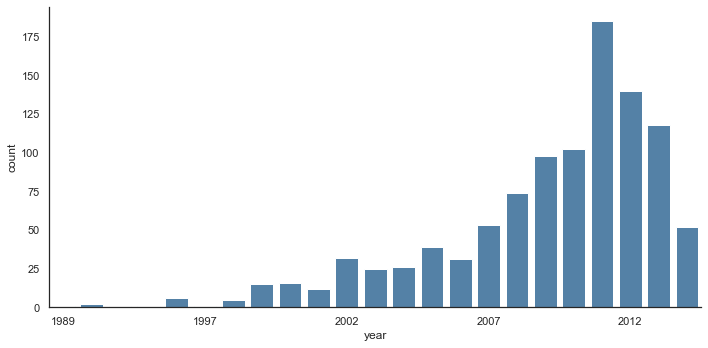

In [143]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

We can learn more by looking at the *method* of discovery of each of these planets:

C:\Users\tsouraki\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\tsouraki\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


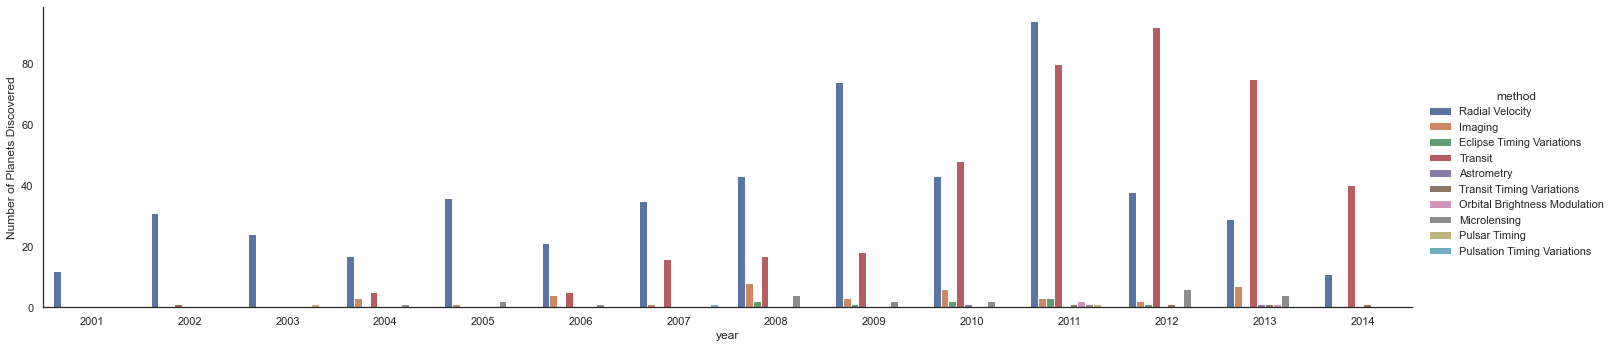

In [144]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')